In [1]:
# Warmup 0
import pandas as pd
from pandas import DataFrame, Series
import sqlite3
import os
import copy

In [2]:
# Warmup 1: Open a connection, define the qry function, and save all of the movies
#           data to a dataframe called "movies_df"
movies_path = "movies.db"
assert os.path.exists(movies_path)
c = sqlite3.connect(movies_path)

def qry(sql, conn = c):
    return pd.read_sql(sql, conn)

movies_df = qry("""
SELECT *
FROM movies
""")
# movies_df

In [3]:
# Warmup 2: What are the names and revenues of the top 2 movies by James Gunn?
qry("""
SELECT title, revenue
FROM movies
WHERE director = "James Gunn"
ORDER BY rating DESC
LIMIT 2
""")

,Title,Revenue
0,Guardians of the Galaxy,333.13
1,Guardians of the Galaxy Vol. 2,389.81


In [4]:
# Warmup 3: What is the average revenue of movies by Brad Bird?
qry("""
SELECT director, AVG(revenue)
FROM movies
WHERE director = "Brad Bird"
""")

,Director,AVG(revenue)
0,Brad Bird,279.45


In [5]:
# Warmup 4: What is the average revenue of movies for each director? Sort your answer from highest to lowest.
qry("""
SELECT director, AVG(revenue) as AvgRev
FROM movies
GROUP BY director
ORDER BY AvgRev DESC
""")

,Director,AvgRev
0,James Cameron,760.510
1,Colin Trevorrow,652.180
2,Thomas Kail,612.820
3,Anthony Russo,551.255
4,Joss Whedon,541.135
...,...,...
674,Alex Ranarivelo,0.000
675,Akan Satayev,0.000
676,Aisling Walsh,0.000
677,Afonso Poyart,0.000


In [6]:
# Warmup 5: Of those directors who had more than 3 movies, what is the average revenue
#           of movies for each director? Sort your answer from highest to lowest.
qry("""
SELECT director, AVG(revenue) as AvgRev, COUNT(*) as TotMovies
FROM movies
GROUP BY director
HAVING TotMovies > 3
ORDER BY AvgRev DESC
""")

,Director,AvgRev,TotMovies
0,Anthony Russo,551.255000,4
1,J.J. Abrams,336.690000,5
2,Francis Lawrence,324.952500,4
3,Christopher Nolan,283.910000,6
4,Brad Bird,279.450000,4
5,David Yates,271.751667,6
6,Jon Favreau,256.400000,4
7,Michael Bay,236.886667,6
8,Peter Jackson,215.112500,4
9,Gore Verbinski,207.455000,4


In [7]:
# Warmup 6: Of those directors who had more than 3 movies with ratings above 7.0,
#           what is the average revenue of those movies for each director?
#           Sort your answer from highest to lowest.
qry("""
SELECT director, AVG(revenue) as AvgRev, COUNT(*) as TotHighMovies
FROM movies
WHERE rating > 7.0
GROUP BY director
HAVING TotHighMovies > 3
ORDER BY AvgRev DESC
""")

,Director,AvgRev,TotHighMovies
0,Anthony Russo,551.255000,4
1,J.J. Abrams,387.517500,4
2,David Yates,300.784000,5
3,Christopher Nolan,283.910000,6
4,Clint Eastwood,164.747500,4
5,Guy Ritchie,112.434000,5
6,David Fincher,105.544000,5
7,Quentin Tarantino,95.988000,5
8,Matthew Vaughn,90.262500,4
9,Martin Scorsese,77.518333,6


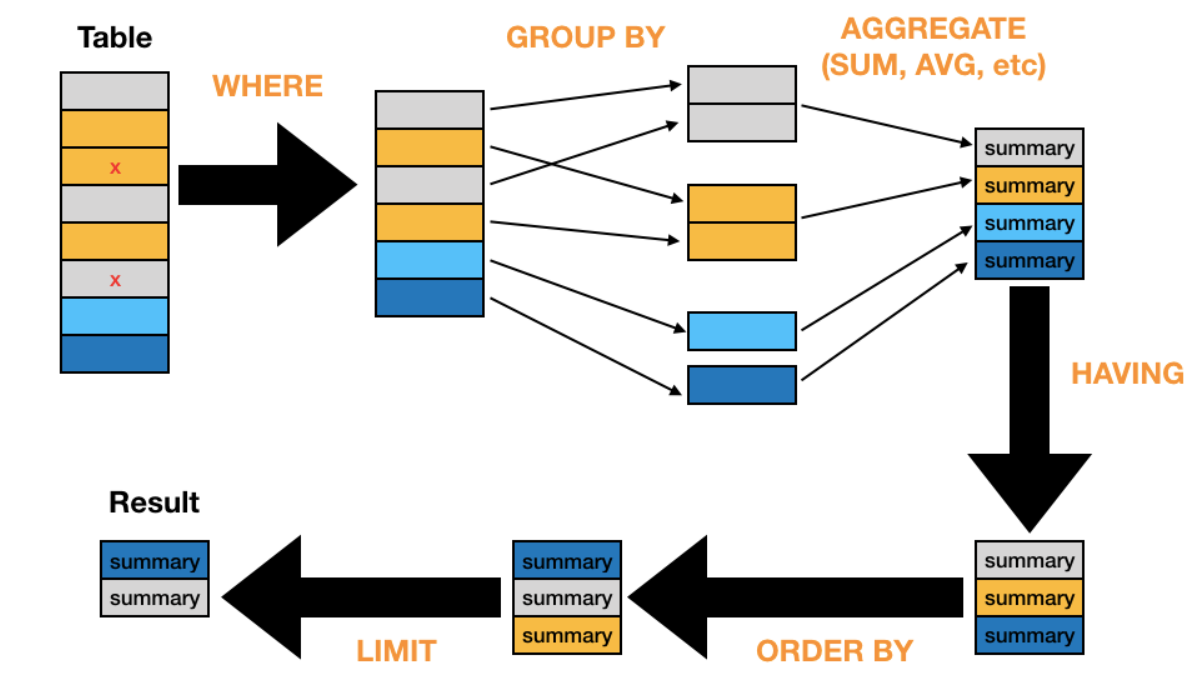

<Axes: xlabel='Rating', ylabel='Revenue'>

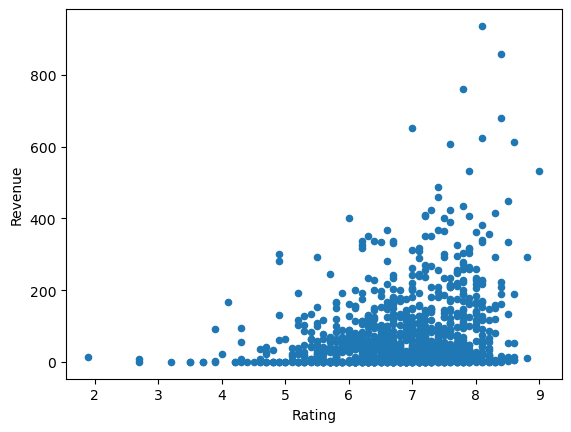

In [8]:
# Warmup 7: Make a scatter plot where the rating is on the x-axis
#           and the revenue is on the y-axis
movies_df.plot.scatter(x="Rating", y="Revenue")

In [9]:
# Warmup 8: What is the correlation between the rating and the revenue?
movies_df[["Rating", "Revenue"]].corr()

,Rating,Revenue
Rating,1.000000,0.256041
Revenue,0.256041,1.000000


# Lecture 34: Bar Plots

Learning Objectives:
- Make a bar plot from a Pandas Series
- Add features: x-label, y-label, title, gridlines, color to plot
- Set the index of a DataFrame certain column
- Create an 'other' column in a DataFrame


In [10]:
# Without this Jupyter notebook cannot display the "first" plot in older versions of Python / mathplotlib / jupyter
%matplotlib inline

### Helpful documentation and an overview of how Matplotlib works
https://matplotlib.org/stable/tutorials/introductory/usage.html


In [11]:
# matplotlib is a plotting module similar to MATLAB
import matplotlib
from matplotlib import pyplot as plt

# matplotlib is highly configurable, acts like a style sheet for Pandas Plots
# rc stands for runtime config, syntax is like a dictionary

#matplotlib.rcParams                        # show all parameters
#matplotlib.rcParams["font.size"]          # show current font size setting
matplotlib.rcParams["font.size"] = 18   # change current font size setting


## Bar plots: From a Series
The index is the x-label

The values are the height of each bar

https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.bar.html

<Axes: >

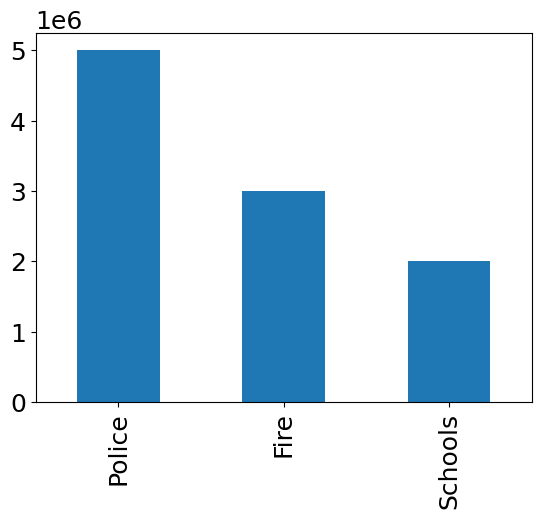

In [12]:
s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})

# make a bar plot...notice the type
s.plot.bar()

matplotlib.axes._axes.Axes

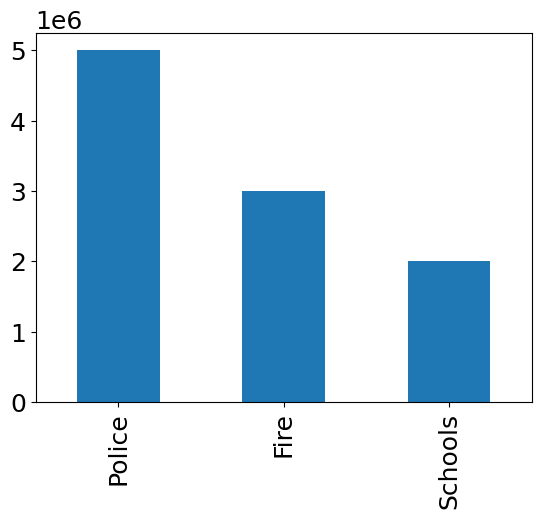

In [13]:
# if we store the returned object in a variable, we can configure the Axes
# typically the variable name used is 'ax'
ax = s.plot.bar() 
type(ax)

### How can we set the x-axis, y-axis labels, and title?
- use the Axes object

Text(0.5, 1.0, 'Annual City Spending')

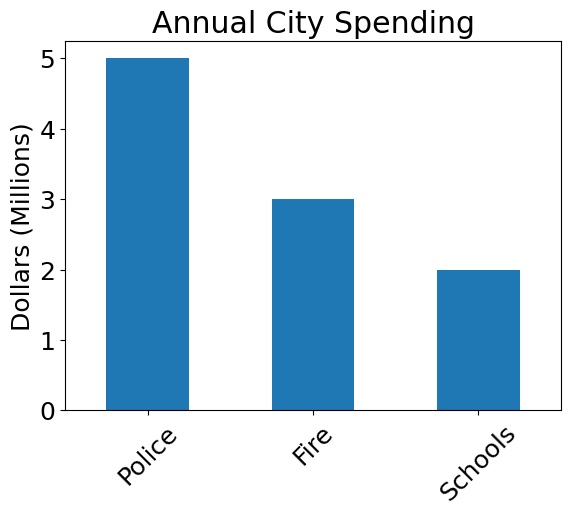

In [14]:
# better plot:
# instead of 1e6, divide all values in s by 1 million
ax = (s / 1000000).plot.bar()

# give the x ticklabels a rotation of 45 degrees
ax.set_xticklabels(list(s.index), rotation = 45)

# set the y_label to "Dollars (Millions)"
ax.set_ylabel("Dollars (Millions)")

# set the title to "Annual City Spending"
ax.set_title("Annual City Spending")

### How can we change the figure size?
- figsize keyword argument
- should be a tuple with two values: width and height (in inches)



Text(0.5, 1.0, 'Annual City Spending')

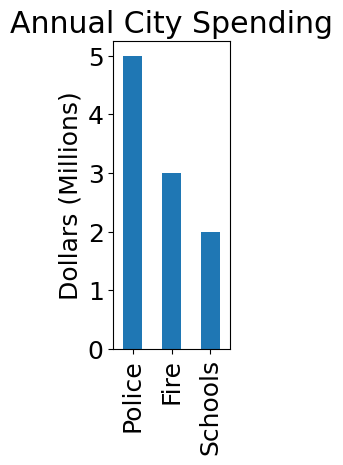

In [15]:
ax = (s / 1000000).plot.bar(figsize = (1.5, 4))
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### How can we make the bars horizontal?
https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.barh.html
- switch figsize arguments
- change y-label to x-label

Text(0.5, 1.0, 'Annual City Spending')

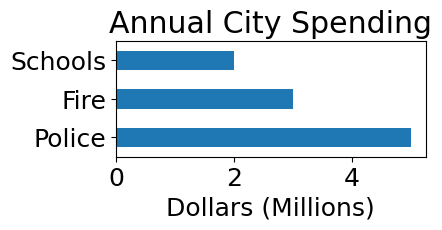

In [16]:
# paste the previous code cell here and modify
ax = (s / 1000000).plot.barh(figsize = (4, 1.5))
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### Change bar color by using the argument color= ' ' 
<pre>
- plot.bar(figsize = (width,height ) , color = ??? )
- 8 standard colors: r, g, b, c, m, y, k, w    color = 'c'  cyan
- can use value of grey between 0 and 1        color = '0.6'
- can use a tuple (r,g,b) between 0 and 1      color = (0, .3, .4)
</pre>

Text(0.5, 1.0, 'Annual City Spending')

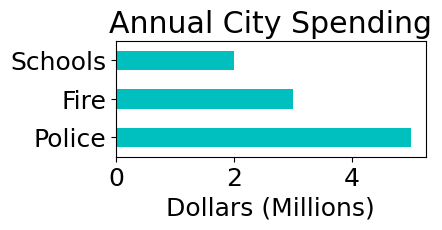

In [17]:
# color as a single char
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color='c')
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

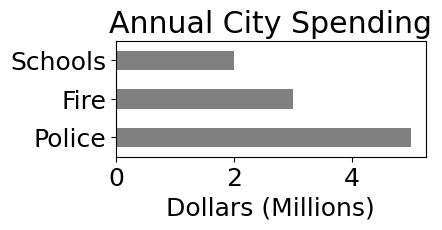

In [18]:
# color as a value of grey
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color='0.5')
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

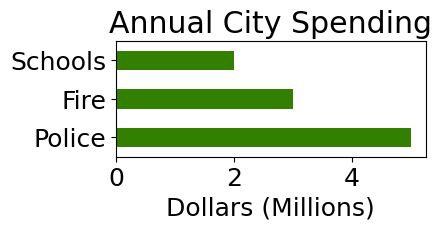

In [19]:
# color as tuple of (r,g,b)
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color=(.2, .5, 0))
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### How can we mark gridlines?
- use ax.grid()

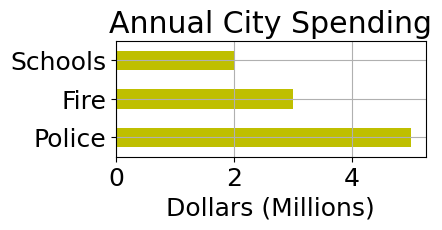

In [20]:
# copy the previous code and add grid lines
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color='y')
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")
ax.grid()

## Examples with the Movies Database

In [21]:
# What happens if we just plot the entire data frame?
#movies_df.plot.bar() # Answer: Each x label is a movie, and there is a bar for each numeric data type.

<Axes: >

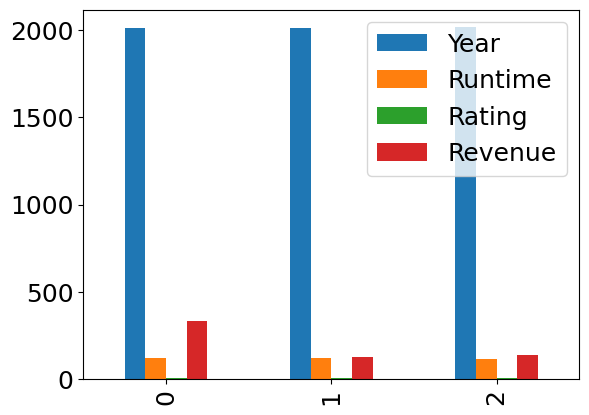

In [22]:
# Let's see that more clearly, plot the first 3 movies
movies_df.iloc[:3].plot.bar()

<Axes: >

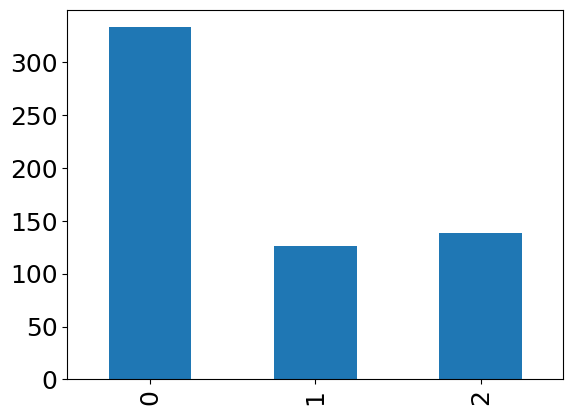

In [23]:
# How about just the revenue?
s = movies_df.iloc[:3]["Revenue"]
s.plot.bar()

In [24]:
# What is movie 0??? Let's make the title our index (hint: it's unique!)
movies_df = movies_df.set_index("Title")
movies_df

,Genre,Director,Cast,Year,Runtime,Rating,Revenue
Title,,,,,,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,333.13
Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael ...",2012,124,7.0,126.46
Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,138.12
Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,270.32
Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,325.02
...,...,...,...,...,...,...,...
Guardians of the Galaxy Vol. 2,"Action, Adventure, Comedy",James Gunn,"Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",2017,136,7.6,389.81
Baby Driver,"Action, Crime, Drama",Edgar Wright,"Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...",2017,113,7.6,107.83
Only the Brave,"Action, Biography, Drama",Joseph Kosinski,"Josh Brolin, Miles Teller, Jeff Bridges, Jenni...",2017,134,7.6,18.34


In [25]:
# What are revenues of the top 10 revenue movies?
top_rev_movies = movies_df["Revenue"].sort_values(ascending=False).iloc[:10]
top_rev_movies

Title
Star Wars: Episode VII - The Force Awakens    936.63
Avengers: Endgame                             858.37
Avatar                                        760.51
Avengers: Infinity War                        678.82
Jurassic World                                652.18
The Avengers                                  623.28
Hamilton                                      612.82
Incredibles 2                                 608.58
The Dark Knight                               533.32
Rogue One                                     532.17
Name: Revenue, dtype: float64

<Axes: title={'center': 'Top Grossing Movies'}, xlabel='Movie', ylabel='Revenue (in Millions)'>

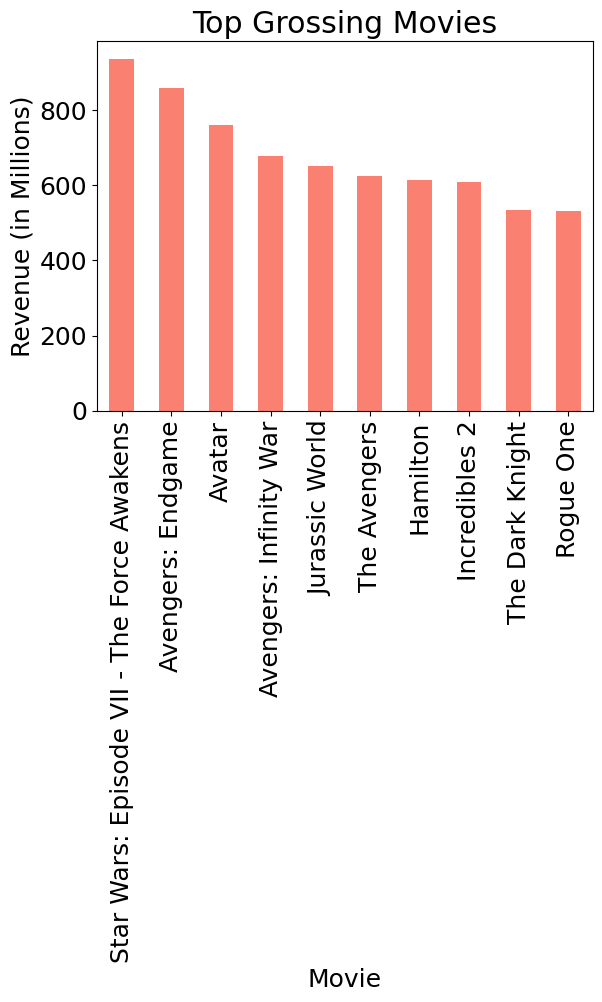

In [26]:
# Now plot them!
top_rev_movies.plot.bar(xlabel="Movie", ylabel="Revenue (in Millions)", title="Top Grossing Movies", color="salmon")

<Axes: title={'center': 'Top Grossing Movies'}, xlabel='Movie', ylabel='Revenue (in Millions)'>

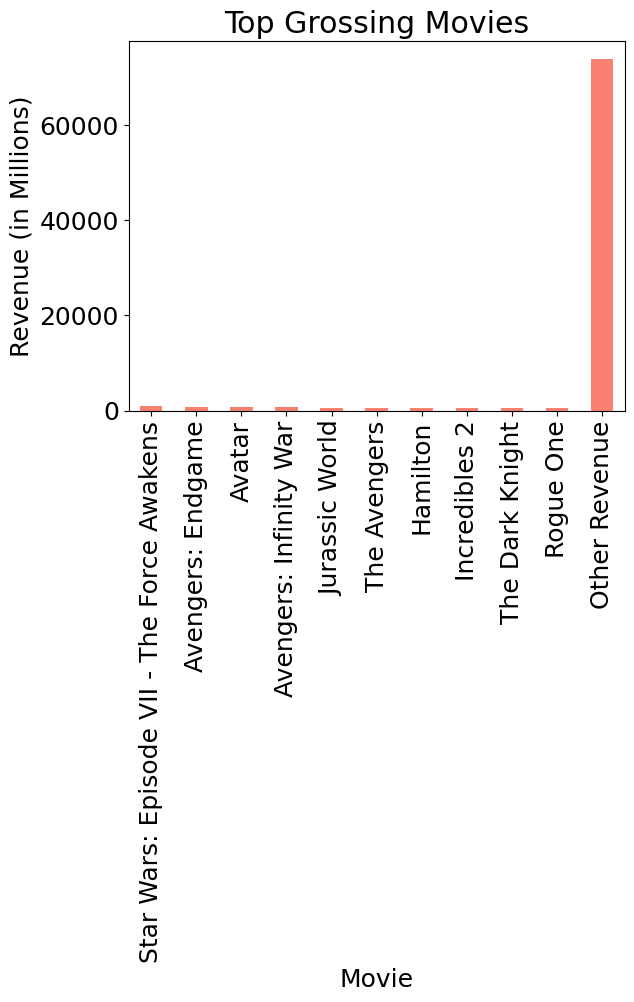

In [27]:
# Wouldn't it be nice to have an "other" bar to represent other revenue?
other_rev = movies_df["Revenue"].sort_values(ascending=False).iloc[10:].sum()
top_rev_movies_with_other = copy.deepcopy(top_rev_movies)
top_rev_movies_with_other["Other Revenue"] = other_rev
top_rev_movies_with_other.plot.bar(xlabel="Movie", ylabel="Revenue (in Millions)", title="Top Grossing Movies", color="salmon")

<Axes: title={'center': 'Top Grossing Movies'}, xlabel='Movie', ylabel='Revenue (in Millions)'>

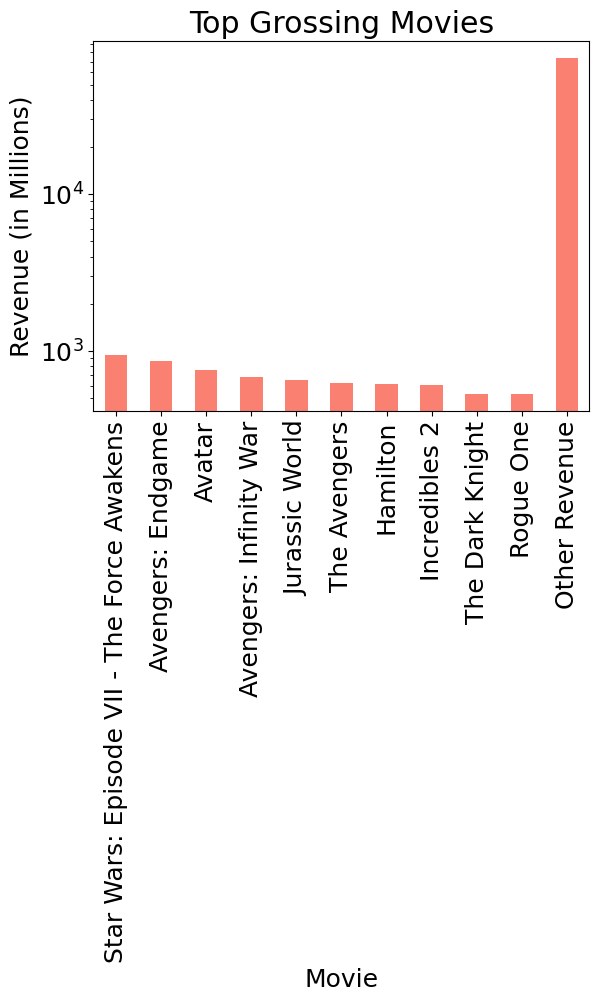

In [28]:
# Add the argument logy=True to show on a logarithmic scale
top_rev_movies_with_other.plot.bar(xlabel="Movie", ylabel="Revenue (in Millions)", title="Top Grossing Movies", color="salmon", logy=True)